## Imports und Weissemodell

In [2]:
#import sys
#sys.version
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import qtb_plot


Could not load modelbase.assimulate. Sundials support disabled.


In [3]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

# Verminderung des ns Werts systematisch 
## Plot der pr-Werte mit Veränderung

In [4]:
qtb_plot.set("notebook")

0.49
0.48
0.47
0.45999999999999996
0.44999999999999996
0.43999999999999995
0.42999999999999994
0.41999999999999993
0.4099999999999999
0.3999999999999999
0.3899999999999999
0.3799999999999999
0.3699999999999999
0.3599999999999999
0.34999999999999987
0.33999999999999986
0.32999999999999985
0.31999999999999984
0.30999999999999983
0.2999999999999998
0.2899999999999998
0.2799999999999998
0.2699999999999998
0.2599999999999998
0.24999999999999978
0.23999999999999977
0.22999999999999976
0.21999999999999975
0.20999999999999974
0.19999999999999973
0.18999999999999972
0.17999999999999972
0.1699999999999997
0.1599999999999997
0.1499999999999997
0.13999999999999968
0.12999999999999967
0.11999999999999968
0.10999999999999968


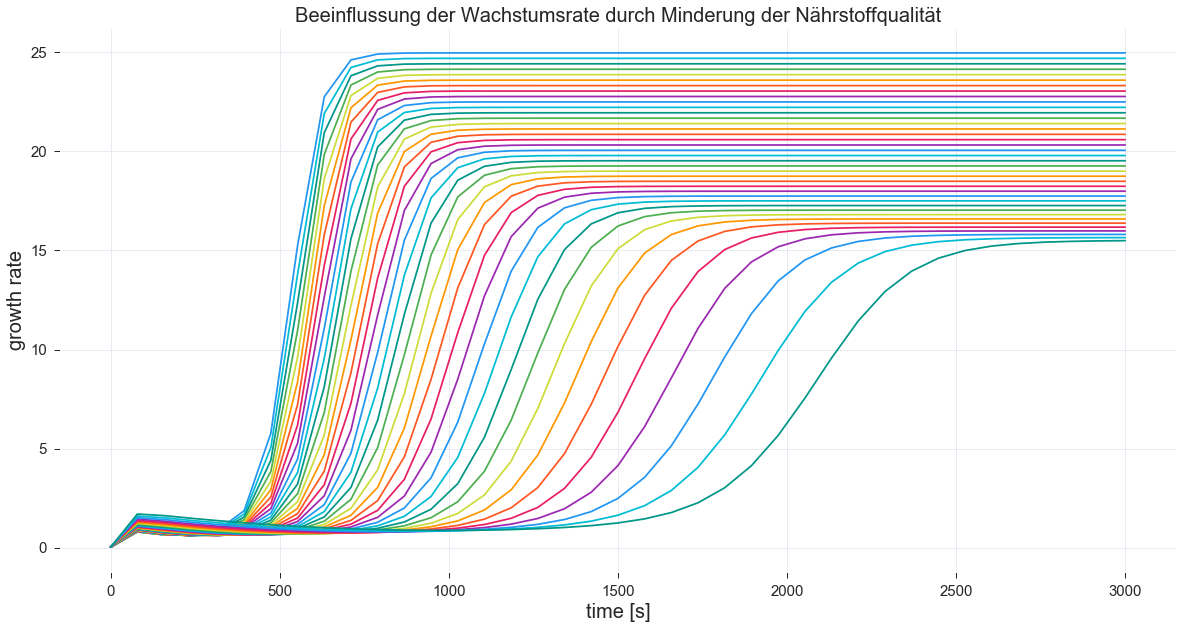

In [93]:
lambdawert = []

ns = defaultParameters["ns"]
prValues = []
valuesOneHundredTimeSteps, valuesLastTimeStep = [], []

for _ in np.linspace(0,5,39):#range(0,4):
    ns = ns - 0.01
    m = WeisseBaseModel({'ns':ns})
    print(ns)

    s = modelbase.Simulator(m)
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    changedValuesOverTimeArray = s.timeCourse(np.linspace(0,3000,39),weise_values);
    valuesOneHundredTimeSteps.append(changedValuesOverTimeArray)
    valuesLastTimeStep.append(changedValuesOverTimeArray[-1])
    #valuesFirstTimeStep.append(changedValuesOverTimeArray[1])
    lambdawert.append(s.getY()[:,16][-1])


    
    
newT = s.getT()[:100]

# Plotten Sie die zeitliche Entwicklung
plt.figure(figsize=(20,10))
plt.title('Beeinflussung der Wachstumsrate durch Minderung der Nährstoffqualität', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('growth rate', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

for i, data in enumerate(valuesOneHundredTimeSteps):
    plt.plot(newT,valuesOneHundredTimeSteps[i][:,10], '-', label = 'pr') 
#plt.legend(loc = 'lower right',prop = {'size': 20})


plt.draw_if_interactive()
plt.show()


In [96]:
y = []
for i, data in enumerate(s.getY()):
    y.append(s.getY()[i][16])

In [97]:
y

[0.008901380694694046,
 0.0003541453411077126,
 0.00037281076737641394,
 0.0003924581510141333,
 0.00041254883967219386,
 0.00043305008474269716,
 0.000454008477936336,
 0.0004755505384719629,
 0.0004979128635161807,
 0.0005214777157852436,
 0.000546813783350437,
 0.0005747254516568524,
 0.0006063158922153535,
 0.0006430743710084943,
 0.0006870025112115169,
 0.0007408010970066303,
 0.0008081469086446404,
 0.000894096460229623,
 0.0010056533147107518,
 0.001152508776790088,
 0.0013478705159814545,
 0.0016090535127730903,
 0.0019570090281984046,
 0.002413144959033455,
 0.0029911646192285687,
 0.003683346463371898,
 0.004447574935357674,
 0.005209255892494615,
 0.0058865786268106875,
 0.006424450283612947,
 0.006810542238691302,
 0.007065810983224269,
 0.0072244619750912965,
 0.007318858974650328,
 0.00737341691578916,
 0.007404375628301757,
 0.007421752177746645,
 0.00743144728841331,
 0.007436841282113367]

In [98]:
s.getY()[:][:][-1]

array([1.28404116e+02, 2.52918092e+00, 2.52413143e+01, 9.36816682e+00,
       9.36816682e+00, 2.34928266e+02, 3.71681622e+02, 6.84007707e+01,
       6.84007707e+01, 1.71530617e+03, 1.54949068e+01, 1.02435847e+04,
       1.02436224e+04, 2.57114664e+05, 3.34422023e+02, 1.09407503e-01,
       7.43684128e-03])

In [103]:
lambdans = []
m = WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
ns = 0.5

while i <= 39:
    m.par.update({'ns': ns})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    #for i, data in enumerate(s.getY()):
    #    lans.append(s.getY()[i][16])
    #    print(i)
    lambdans.append(s.getY()[:,16][-1])
    
    i += 1
    ns -= 0.01 


lambdans  

[0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851,
 0.02426281278190851]

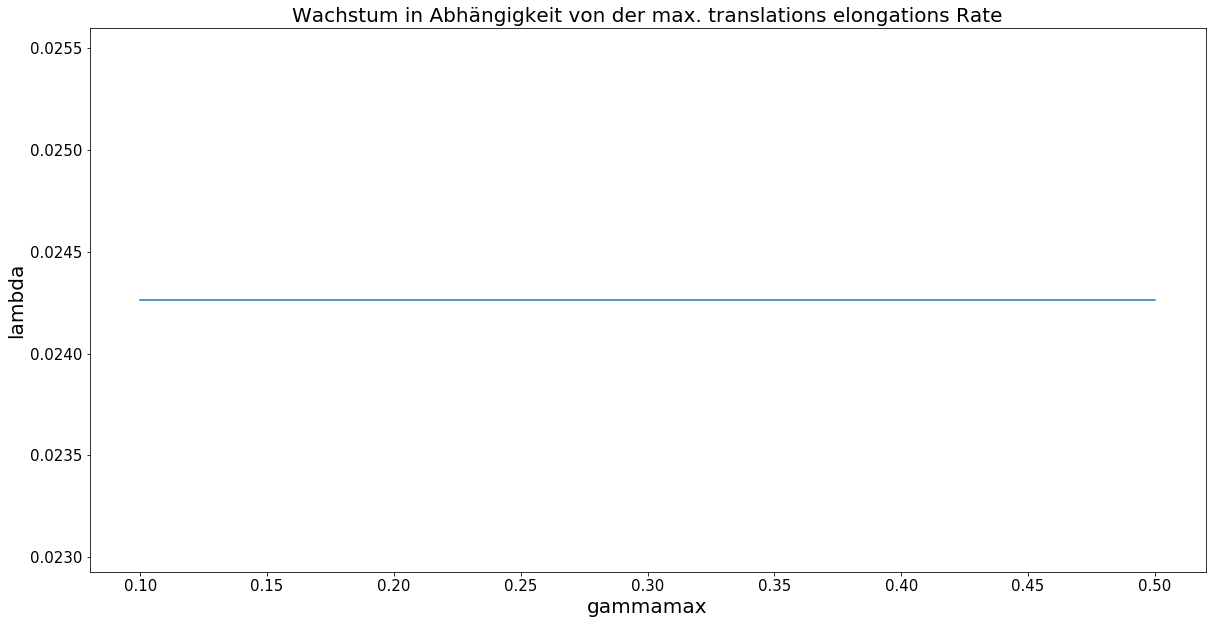

In [45]:
x = np.linspace(0.5,0.1,39)#[200,400,600,800,1000,1200,1400,1600,1800,2000]
y = lambdans
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. translations elongations Rate', size = 20)
plt.xlabel('gammamax', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(x,y)


In [183]:
prtest[10]

[24.962410217100825,
 24.68808625174456,
 24.413504712744786,
 24.138736997770838,
 23.863856707564114,
 23.58893982182796,
 23.314064902511983,
 23.03931332918861,
 22.764769572102665,
 22.490521509621775,
 22.21666079816729,
 21.943283304423314,
 21.67048961173044,
 21.39838561521231,
 21.127083223515463,
 20.856701189224726,
 20.587366095385317,
 20.319213532368277,
 20.052389508164183,
 19.78705214663441,
 19.523373743241855,
 19.261543267584937,
 19.001769428422705,
 18.744284452324703,
 18.489348775204576,
 18.23725691211455,
 17.98834486245842,
 17.742999536854473,
 17.501670875931932,
 17.264887597050645,
 17.03327789353109,
 16.807596980967467,
 16.588764193713747,
 16.3779132597351,
 16.176458963090756,
 15.986171535326488,
 15.809161591450145,
 15.647087075617883,
 15.494907024033026]

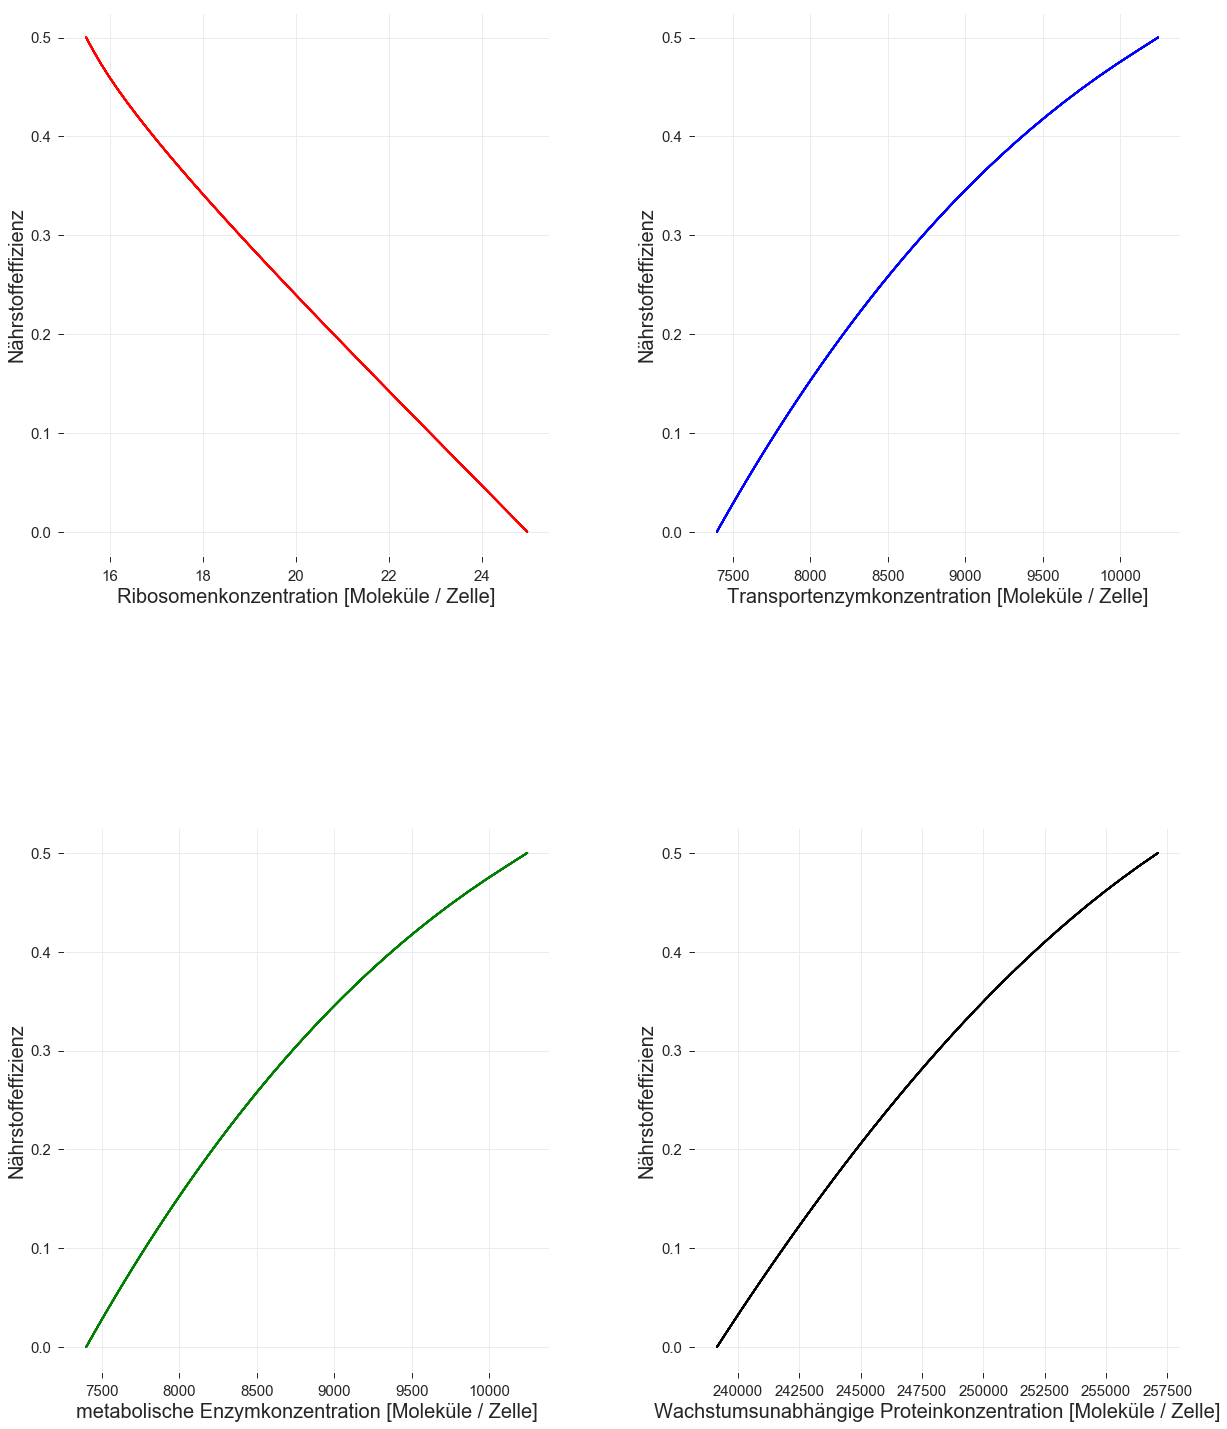

In [197]:
fig, Plotlist = plt.subplots(2,2,figsize=(20,25))
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)
Plotlist = Plotlist.ravel()

y = np.linspace(0,.5,39)

for i, data in enumerate(prtest):
    Plotlist[0].plot(prtest[10],y, 'r-', label = 'Ribosomen')
#Plotlist[0].set_title('cr', size ='15')
Plotlist[0].set_xlabel('Ribosomenkonzentration [Moleküle / Zelle]', size ='20')
Plotlist[0].set_ylabel('Nährstoffeffizienz', size ='20')
Plotlist[0].tick_params(**{'labelsize': 15})
#Plotlist[0].set_ylim(0,900)
#Plotlist[0].set_xlim(0,3000)


for i, data in enumerate(prtest):
    Plotlist[1].plot(prtest[11],y, 'b-',label = 'pt')
#Plotlist[1].set_title('ct', size ='15')
Plotlist[1].set_xlabel('Transportenzymkonzentration [Moleküle / Zelle]', size ='20')
Plotlist[1].set_ylabel('Nährstoffeffizienz', size ='20')
Plotlist[1].tick_params(**{'labelsize': 15})
#Plotlist[1].set_ylim(0,80)
#Plotlist[1].set_xlim(0,3000)

                                                       
for i, data in enumerate(prtest):
       Plotlist[2].plot(prtest[12],y, 'g-',label = 'pm')
#Plotlist[2].set_title('cm', size ='15')
Plotlist[2].set_xlabel('metabolische Enzymkonzentration [Moleküle / Zelle]', size ='20')
Plotlist[2].set_ylabel('Nährstoffeffizienz', size ='20')
Plotlist[2].tick_params(**{'labelsize': 15})
#Plotlist[2].set_ylim(0,80)
#Plotlist[2].set_xlim(0,3000)

for i, data in enumerate(prtest):
       Plotlist[3].plot(prtest[13],y, color= 'black' ,label = 'pq')
#Plotlist[3].set_title('cq', size ='15')
Plotlist[3].set_xlabel('Wachstumsunabhängige Proteinkonzentration [Moleküle / Zelle]', size ='20')
Plotlist[3].set_ylabel('Nährstoffeffizienz',size ='20')
Plotlist[3].tick_params(**{'labelsize': 15})
#Plotlist[3].set_ylim(0,2500)
#Plotlist[3].set_xlim(0,3000)

In [195]:
y

array([0.        , 0.01315789, 0.02631579, 0.03947368, 0.05263158,
       0.06578947, 0.07894737, 0.09210526, 0.10526316, 0.11842105,
       0.13157895, 0.14473684, 0.15789474, 0.17105263, 0.18421053,
       0.19736842, 0.21052632, 0.22368421, 0.23684211, 0.25      ,
       0.26315789, 0.27631579, 0.28947368, 0.30263158, 0.31578947,
       0.32894737, 0.34210526, 0.35526316, 0.36842105, 0.38157895,
       0.39473684, 0.40789474, 0.42105263, 0.43421053, 0.44736842,
       0.46052632, 0.47368421, 0.48684211, 0.5       ])

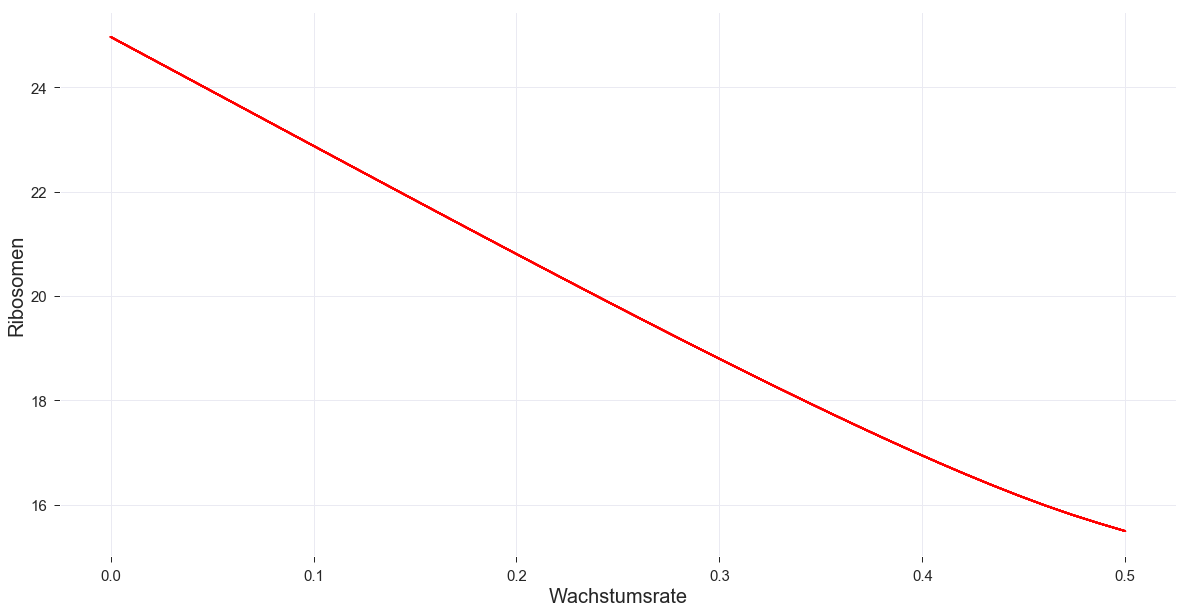

In [43]:
y = np.linspace(0,.5,39)
plt.figure(figsize=(20,10))
#plt.title('Pr gegen Steady', size = 20)
plt.xlabel('Wachstumsrate', size = 20)
plt.ylabel('Ribosomen', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

#prtest = zum letzten Zeitschirtt alle 39 Werte jedes Parameters in einer Liste.
prtest = []
for n, datan in enumerate(valuesLastTimeStep[0]): 
    prtest.append([valuesLastTimeStep[i][n]for i, data in enumerate(valuesLastTimeStep)])

#prlast = []
#for i, data in enumerate(valuesLastTimeStep):
#    prlast.append(valuesLastTimeStep [i][10])
    
for i, data in enumerate(prtest):
    plt.plot(y,prtest[10], 'r-', label = 'Ribosomen')
    #plt.plot(prtest[11],y, 'b-',label = 'pt')
    #plt.plot(prtest[12],y, 'g-',label = 'pm')
    #plt.plot(prtest[13],y, color= 'black' ,label = 'pq')
    #plt.label()

plt.draw_if_interactive()

plt.show()

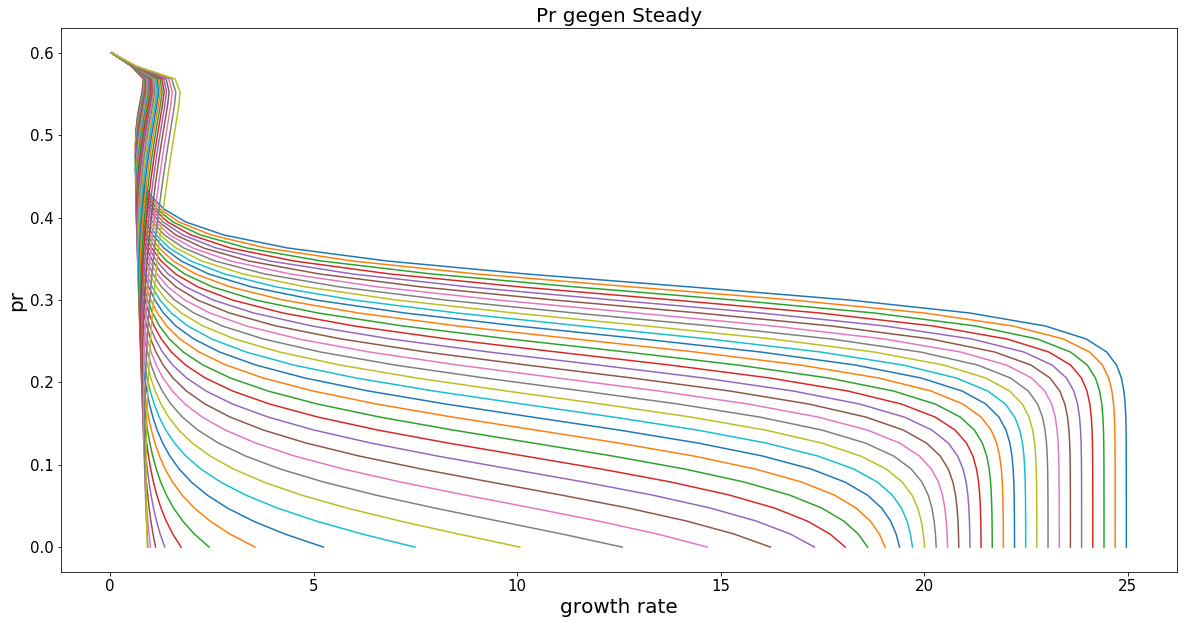

In [10]:
y = np.linspace(0,.6,39)

plt.figure(figsize=(20,10))
plt.title('Pr gegen Steady', size = 20)
plt.xlabel('growth rate', size = 20)
plt.ylabel('pr', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)


pr = []
for n in range(0,100): 
    pr.append([valuesOneHundredTimeSteps[i][n][10]for i, data in enumerate(valuesOneHundredTimeSteps)])

    
plt.plot(pr[:39][::-1],y, label = 'pr')


plt.draw_if_interactive()
plt.show()

## Pr gegen steatdy

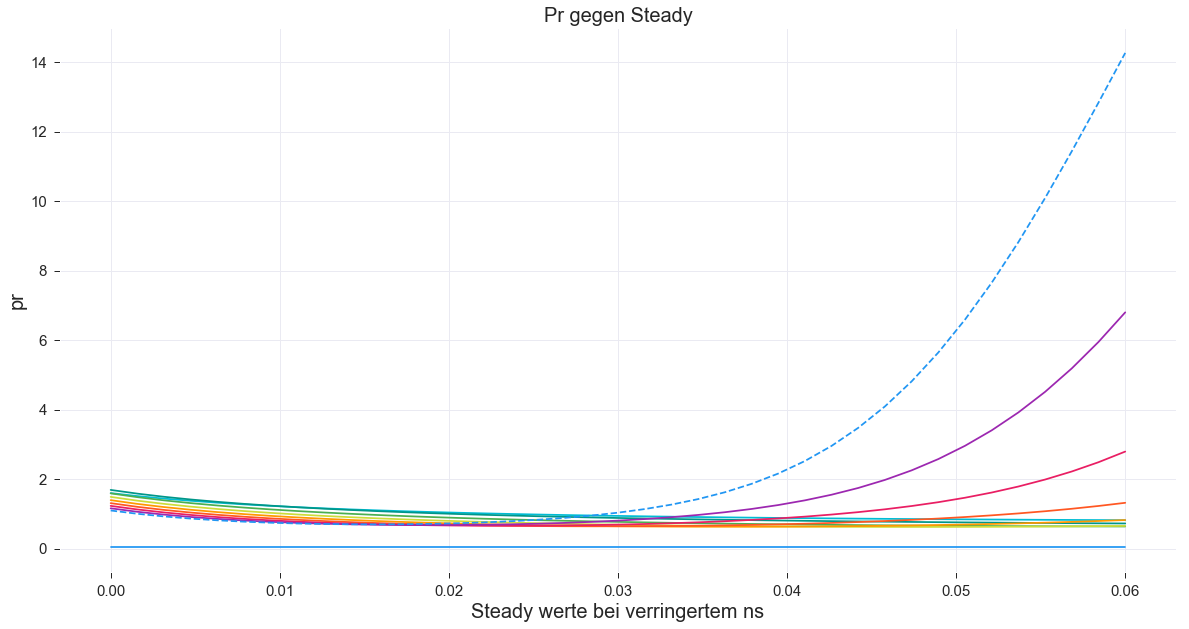

In [6]:
la = np.linspace(0,0.06,39)
values = []
for n in range(0,100): 
    values.append([valuesOneHundredTimeSteps[i][n][10] for i, data in enumerate(valuesOneHundredTimeSteps)])

#for i, data in enumerate(valuesOneHundredTimeSteps):
#    print(valuesOneHundredTimeSteps[i][n][10])
  
plt.figure(figsize=(20,10))
plt.title('Pr gegen Steady', size = 20)
plt.xlabel('Steady werte bei verringertem ns', size = 20)
plt.ylabel('pr', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.xlim(0,0.9)
#plt.ylim()

for n1 in range(0,20,2):
    plt.plot(la,values[n1][::-1])
    
plt.show()


# Subplots zu allen cl

(0, 3000)

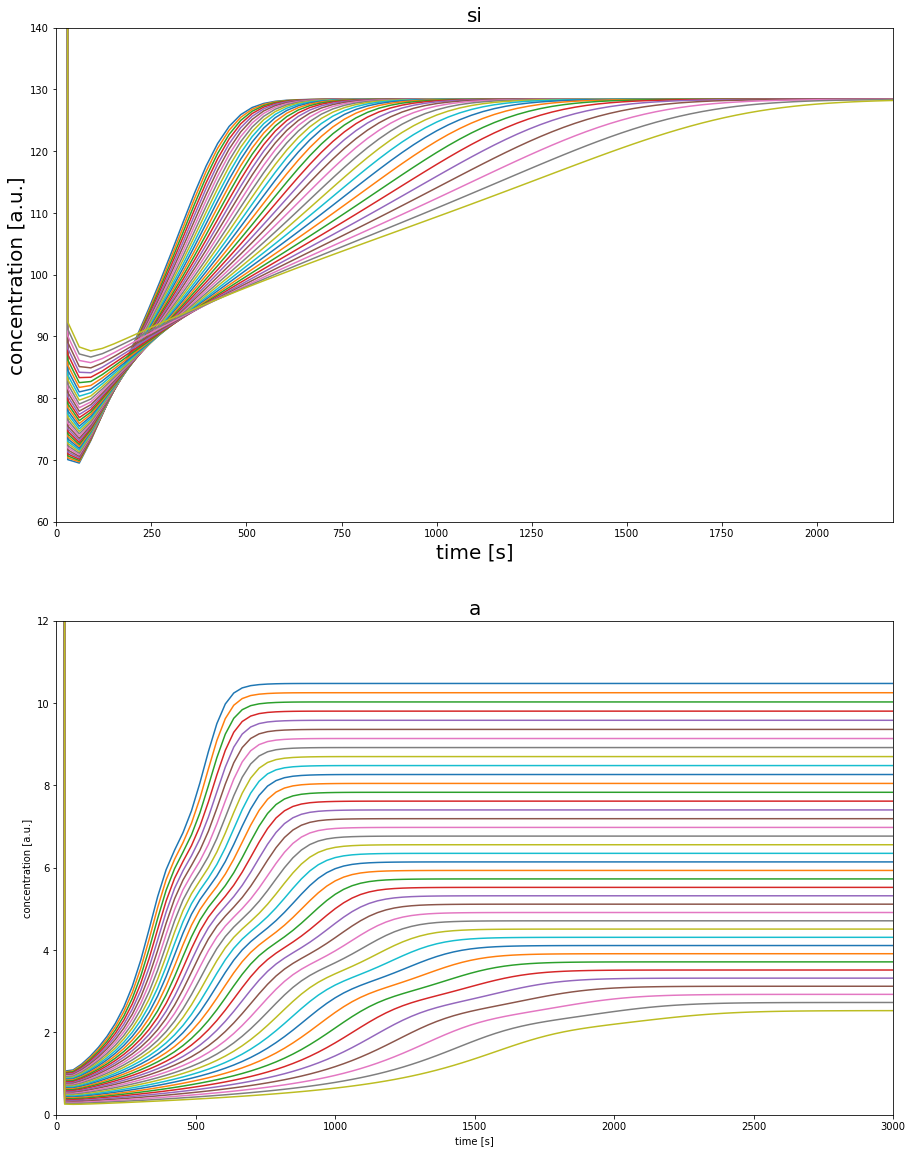

In [12]:
fig, Plotlist = plt.subplots(2,1,figsize=(15,20))
Plotlist = Plotlist.ravel()
for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT,valuesOneHundredTimeSteps[i][:,0])#, label = cl[0])

Plotlist[0].set_title('si', size ='20')
Plotlist[0].set_xlabel('time [s]',size ='20')
Plotlist[0].set_ylabel('concentration [a.u.]', size ='20')
Plotlist[0].set_ylim(60,140)
Plotlist[0].set_xlim(0,2200)
#Plotlist[0].legend(loc = 'lower right')

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT,valuesOneHundredTimeSteps[i][:,1])
Plotlist[1].set_title('a',size ='20')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].set_ylim(0,12)
Plotlist[1].set_xlim(0,3000)
#Plotlist[1].legend(loc = 'upper right')



(0, 2500)

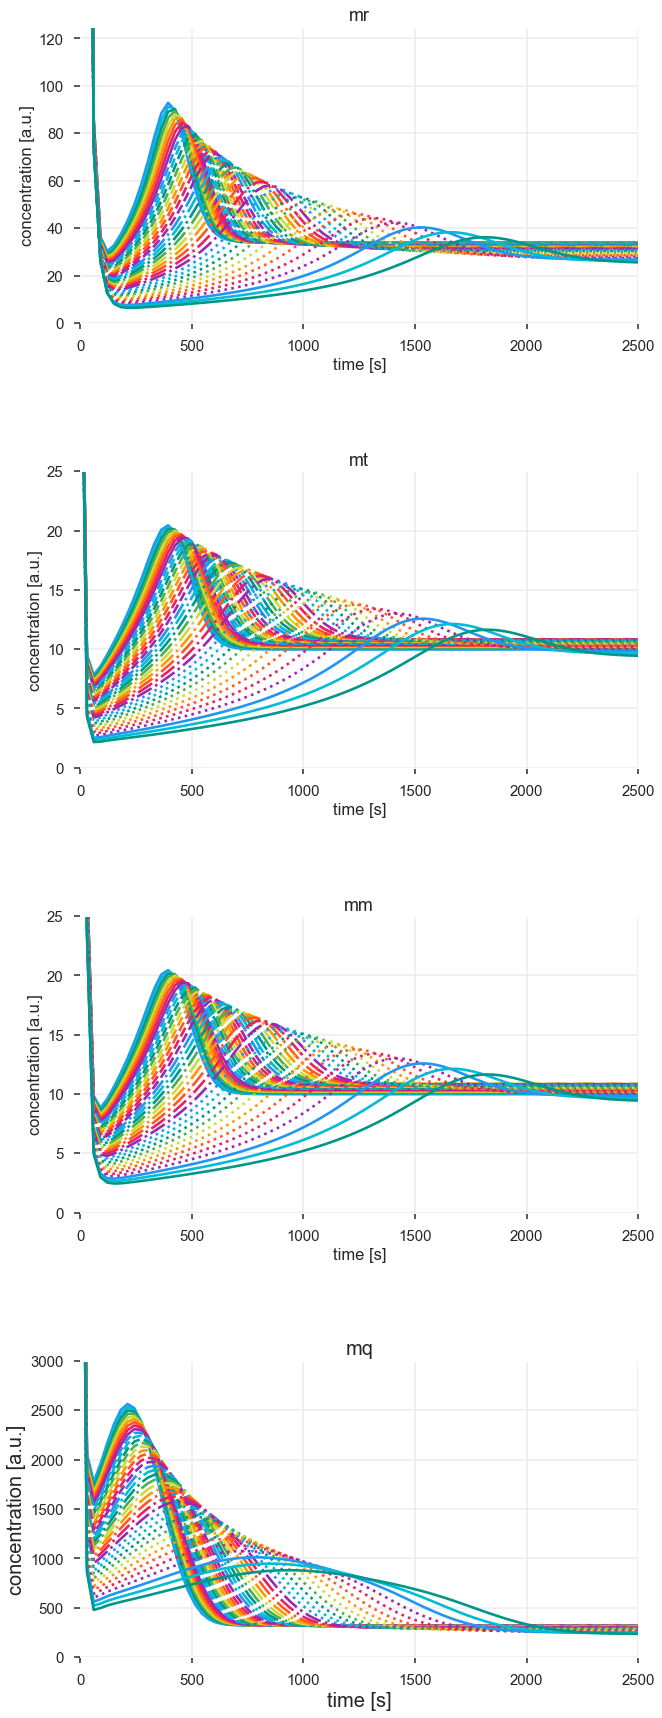

In [28]:
fig, Plotlist = plt.subplots(4,1,figsize=(10,30))
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)
Plotlist = Plotlist.ravel()
for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT,valuesOneHundredTimeSteps[i][:,2])#,label = '{0} für einen ns von {1}'.format(cl[2],i[0]))
Plotlist[0].set_title('mr')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].set_ylim(0,125)
Plotlist[0].set_xlim(0,2500)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT,valuesOneHundredTimeSteps[i][:,3])
Plotlist[1].set_title('mt')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].set_ylim(0,25)
Plotlist[1].set_xlim(0,2500)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[2].plot(newT,valuesOneHundredTimeSteps[i][:,4])
Plotlist[2].set_title('mm')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].set_ylim(0,25)
Plotlist[2].set_xlim(0,2500)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[3].plot(newT,valuesOneHundredTimeSteps[i][:,5])
Plotlist[3].set_title('mq', size ='20')
Plotlist[3].set_xlabel('time [s]', size ='20')
Plotlist[3].set_ylabel('concentration [a.u.]', size ='20')
Plotlist[3].set_ylim(0,3000)
Plotlist[3].set_xlim(0,2500)



(0, 3000)

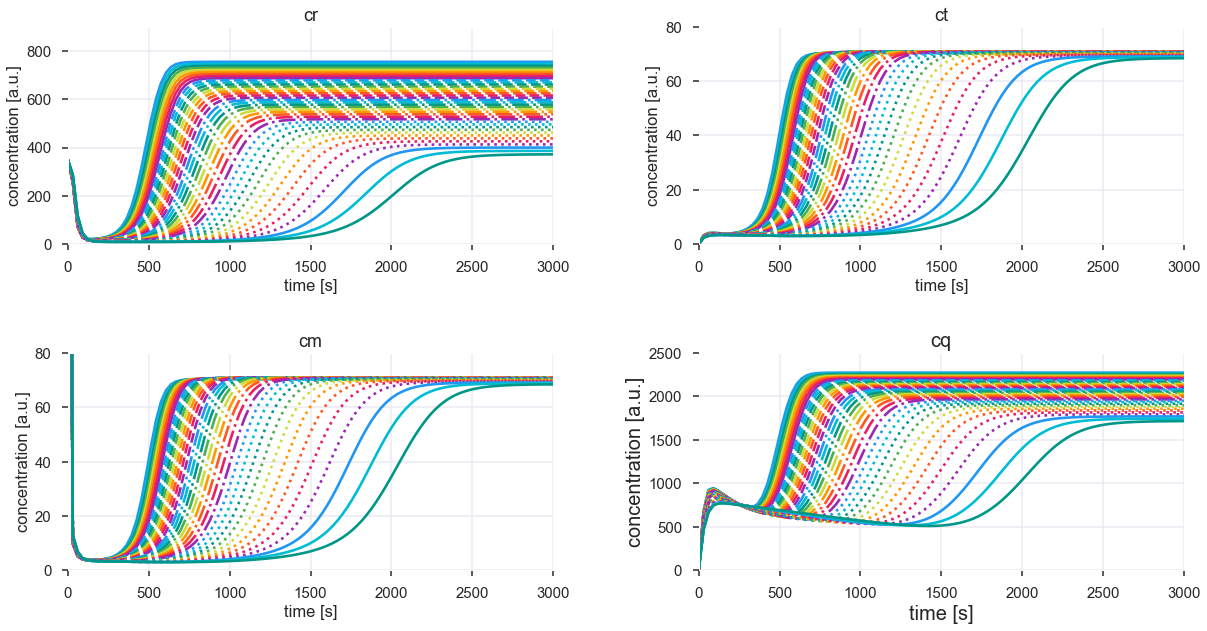

In [27]:
fig, Plotlist = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)
Plotlist = Plotlist.ravel()

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT,valuesOneHundredTimeSteps[i][:,6])
Plotlist[0].set_title('cr')
Plotlist[0].set_xlabel('time [s]')
Plotlist[0].set_ylabel('concentration [a.u.]')
Plotlist[0].set_ylim(0,900)
Plotlist[0].set_xlim(0,3000)


for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT,valuesOneHundredTimeSteps[i][:,7])
Plotlist[1].set_title('ct')
Plotlist[1].set_xlabel('time [s]')
Plotlist[1].set_ylabel('concentration [a.u.]')
Plotlist[1].set_ylim(0,80)
Plotlist[1].set_xlim(0,3000)

                                                       
for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[2].plot(newT,valuesOneHundredTimeSteps[i][:,8])
Plotlist[2].set_title('cm')
Plotlist[2].set_xlabel('time [s]')
Plotlist[2].set_ylabel('concentration [a.u.]')
Plotlist[2].set_ylim(0,80)
Plotlist[2].set_xlim(0,3000)

for i, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[3].plot(newT,valuesOneHundredTimeSteps[i][:,9])
Plotlist[3].set_title('cq', size ='20')
Plotlist[3].set_xlabel('time [s]', size ='20')
Plotlist[3].set_ylabel('concentration [a.u.]',size ='20')
Plotlist[3].set_ylim(0,2500)
Plotlist[3].set_xlim(0,3000)


In [7]:
qtb_plot.set("notebook")

In [42]:
len(valuesOneHundredTimeSteps[0][0])

14

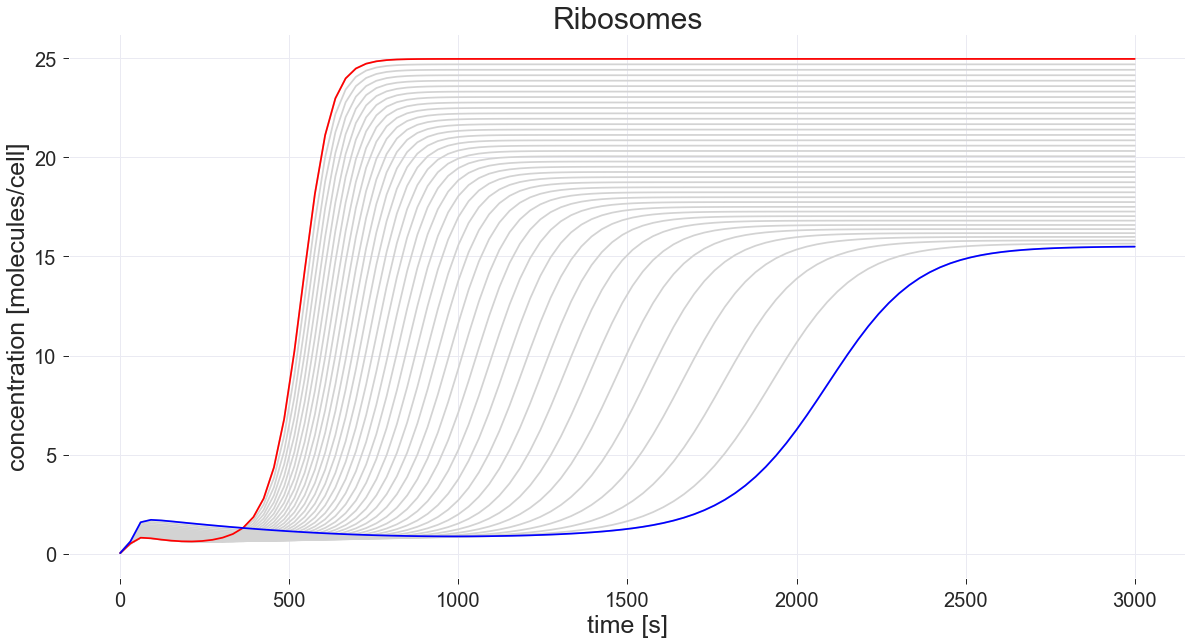

In [28]:
plt.figure(figsize=(20,10))

for i, data in enumerate(valuesOneHundredTimeSteps):
    plt.plot(newT, valuesOneHundredTimeSteps[i][:,10], '-', color='lightgrey')
plt.plot(newT, valuesOneHundredTimeSteps[0][:,10], '-',color='red')
plt.plot(newT, valuesOneHundredTimeSteps[38][:,10], '-',color='blue')
plt.title('Ribosomes', size ='30') #ribosomes
plt.xlabel('time [s]', size ='25')
plt.ylabel('concentration [molecules/cell]', size ='25')
plt.tick_params(**{'labelsize': 20})

In [184]:
valuesOneHundredTimeSteps[0][:,10]

array([ 0.0414    ,  0.80942949,  0.65902076,  0.64416955,  0.88648861,
        1.87576344,  5.78627306, 15.24247197, 22.7468613 , 24.60902657,
       24.90455555, 24.95395805, 24.9611466 , 24.96221101, 24.96238117,
       24.96240579, 24.96240953, 24.96241012, 24.9624102 , 24.96241021,
       24.96241022, 24.96241022, 24.96241022, 24.96241022, 24.96241022,
       24.96241022, 24.96241022, 24.96241022, 24.96241022, 24.96241022,
       24.96241022, 24.96241022, 24.96241022, 24.96241022, 24.96241022,
       24.96241022, 24.96241022, 24.96241022, 24.96241022])

In [186]:
valuesOneHundredTimeSteps[0][:,10][-1]

24.96241021713022

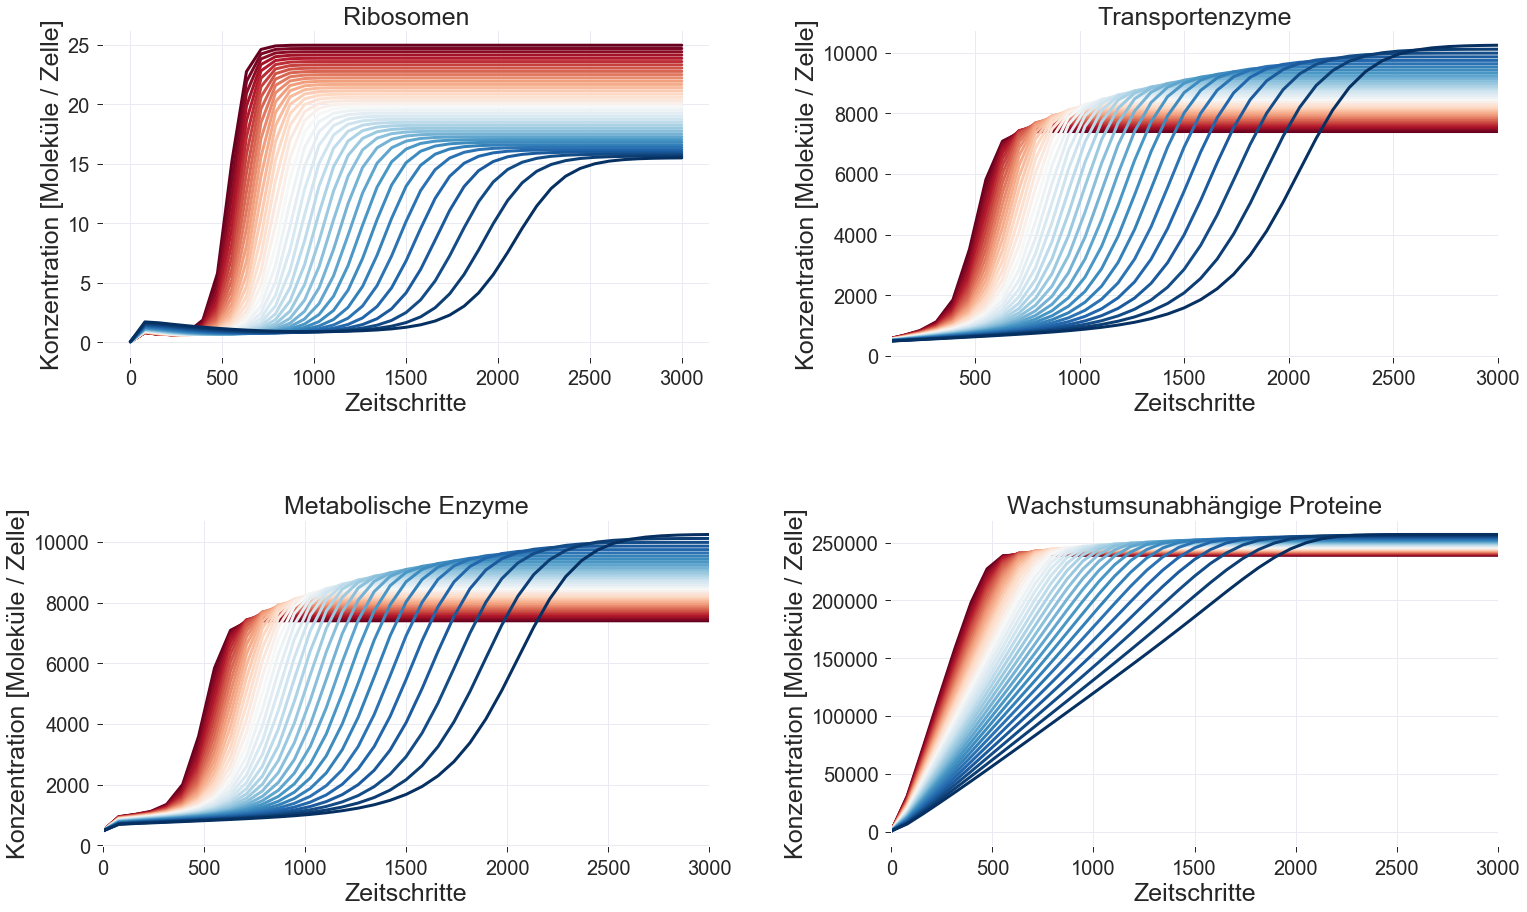

In [187]:
fig, Plotlist = plt.subplots(2,2,figsize=(25,15))
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.3)
Plotlist = Plotlist.ravel()

n_lines = 39

color_idx = np.linspace(0, 1, n_lines)

ribosomen, transport, metabolit, unabhaengig = [], [], [], []

for j, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[0].plot(newT, valuesOneHundredTimeSteps[j][:,10],'-', color=plt.cm.RdBu(color_idx[j]), lw=3)
    ribosomen.append(valuesOneHundredTimeSteps[j][:,10][-1])
Plotlist[0].set_title('Ribosomen', size ='25') #ribosomes
Plotlist[0].set_xlabel('Zeitschritte', size ='25')
Plotlist[0].set_ylabel('Konzentration [Moleküle / Zelle]', size ='25')
Plotlist[0].tick_params(**{'labelsize': 20})

#Plotlist[0].set_xticks(size=10)
#Plotlist[0].set_yticks(size=8)
#Plotlist[0].set_ylim(0,2000)
#Plotlist[0].set_xlim(100,3000)


for j, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[1].plot(newT, valuesOneHundredTimeSteps[j][:,11],'-', color=plt.cm.RdBu(color_idx[j]), lw=3)
    transport.append(valuesOneHundredTimeSteps[j][:,11][-1])
Plotlist[1].set_title('Transportenzyme', size ='25')#transport enzymes
Plotlist[1].set_xlabel('Zeitschritte', size ='25')
Plotlist[1].set_ylabel('Konzentration [Moleküle / Zelle]', size ='25')
Plotlist[1].tick_params(**{'labelsize': 20})
#Plotlist[1].set_ylim(0,2000)
Plotlist[1].set_xlim(100,3000)


for j, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[2].plot(newT, valuesOneHundredTimeSteps[j][:,12],'-', color=plt.cm.RdBu(color_idx[j]), lw=3)
    metabolit.append(valuesOneHundredTimeSteps[j][:,12][-1])
Plotlist[2].set_title('Metabolische Enzyme', size ='25')#Metabolische Enzyme metabolic enzymes
Plotlist[2].set_xlabel('Zeitschritte', size ='25')
Plotlist[2].set_ylabel('Konzentration [Moleküle / Zelle]', size ='25')
Plotlist[2].tick_params(**{'labelsize': 20})
#Plotlist[2].set_ylim(0,2000)
Plotlist[2].set_xlim(0,3000)


for j, data in enumerate(valuesOneHundredTimeSteps):
    Plotlist[3].plot(newT, valuesOneHundredTimeSteps[j][:,13],'-', color=plt.cm.RdBu(color_idx[j]), lw=3)
    unabhaengig.append(valuesOneHundredTimeSteps[j][:,13][-1])
Plotlist[3].set_title('Wachstumsunabhängige Proteine', size ='25')#growth-independent proteins
Plotlist[3].set_xlabel('Zeitschritte', size ='25')
Plotlist[3].set_ylabel('Konzentration [Moleküle / Zelle]', size ='25')
Plotlist[3].tick_params(**{'labelsize': 20})
#Plotlist[3].set_ylim(0,5000)
Plotlist[3].set_xlim(0,3000)

fig.savefig('veringerung_ns.png', bbox_inches='tight')


In [192]:
metabolit

[7398.976343781378,
 7446.309170516088,
 7494.395058225697,
 7543.259006693803,
 7592.9275845882685,
 7643.429074749073,
 7694.793636384717,
 7747.053486515531,
 7800.2431033901075,
 7854.3994550475645,
 7909.562256742008,
 7965.774261591247,
 8023.081589590898,
 8081.534101073127,
 8141.185821831317,
 8202.095428525647,
 8264.32680470456,
 8327.949679833595,
 8393.040366410358,
 8459.682613421382,
 8527.96859851635,
 8598.000086433307,
 8669.88978774532,
 8743.762960424816,
 8819.759307586359,
 8898.03523891338,
 8978.76658192132,
 9062.151853948,
 9148.4162389006,
 9237.816457706575,
 9330.646782007123,
 9427.246519578217,
 9528.009380293566,
 9633.395066989888,
 9743.942276904141,
 9860.274023245345,
 9983.031511467028,
 10112.308608287283,
 10243.622417589559]

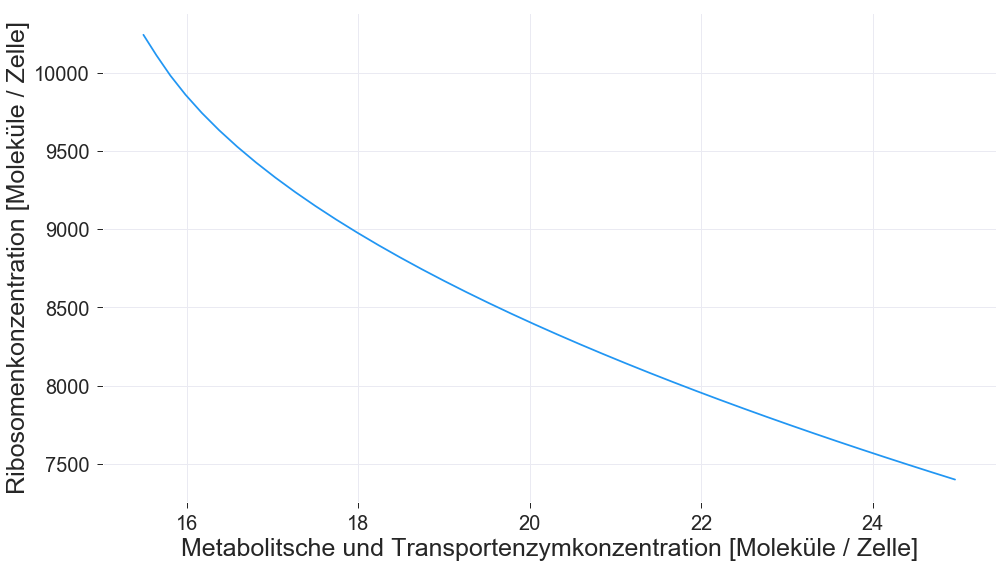

In [224]:



plt.plot(ribosomen, transport)
#Plotlist[0].set_title('cr')
plt.xlabel('Metabolitsche und Transportenzymkonzentration [Moleküle / Zelle]', size = 25)
plt.ylabel('Ribosomenkonzentration [Moleküle / Zelle]', size = 25)
plt.tick_params(**{'labelsize': 20})




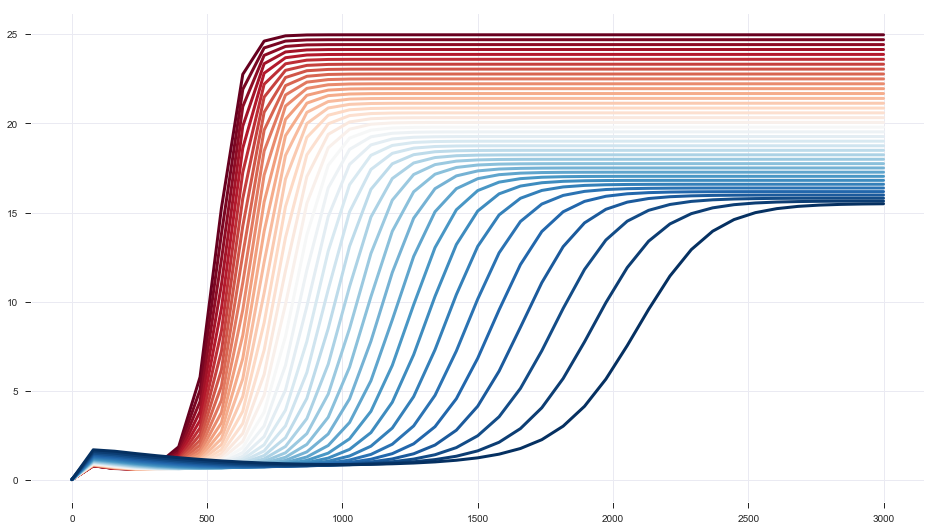

In [170]:
n_lines = 39
x = np.linspace(0, 10)
phase_shift = np.linspace(0, np.pi, n_lines)

color_idx = np.linspace(0, 1, n_lines)
for j, data in enumerate(valuesOneHundredTimeSteps):
    plt.plot(newT, valuesOneHundredTimeSteps[j][:,10],'-', color=plt.cm.RdBu(color_idx[j]), lw=3)


plt.show()